# ABHISHEK KUMAR
aveseq.pvt@gmail.com

21BAI1379

# Generative AI - Retrieval-Augmented Generation (RAG)
Implement a simple RAG pipeline using a pre-trained model from Hugging Face to answer
questions based on a custom text dataset.

In [1]:
!pip install transformers datasets faiss-cpu sentence-transformers wandb seaborn wordcloud matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.2/69.2 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.9/275.9 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.3/20.3 MB 77.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 61.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.6/207.6 kB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.6/322.6 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

## 1. Importing libraries

In [2]:
import pandas as pd
import torch
import wandb
import faiss
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Load and explore the dataset

In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
file_path = "/content/drive/MyDrive/TataCommn/wiki_movie_plots_deduped.csv"

In [6]:
df = pd.read_csv(file_path)

In [7]:
df.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


from matplotlib import pyplot as plt
_df_0['Release Year'].plot(kind='hist', bins=20, title='Release Year')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Title').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('Director').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('Wiki Page').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Plot').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Release Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Release Year'}, axis=1)
              .sort_values('Release Year', ascending=True))
  xs = counted['Release Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('Release Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Title')):
  _plot_series(series, series_name, i)
  fig.legend(title='Title', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Release Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Release Year'}, axis=1)
              .sort_values('Release Year', ascending=True))
  xs = counted['Release Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('Release Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Director')):
  _plot_series(series, series_name, i)
  fig.legend(title='Director', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Release Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Release Year'}, axis=1)
              .sort_values('Release Year', ascending=True))
  xs = counted['Release Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('Release Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Wiki Page')):
  _plot_series(series, series_name, i)
  fig.legend(title='Wiki Page', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release Year')
_ = plt.ylabel('count()')

) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Release Year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Release Year'}, axis=1)
              .sort_values('Release Year', ascending=True))
  xs = counted['Release Year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Release Year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Plot')):
  _plot_series(series, series_name, i)
  fig.legend(title='Plot', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Release Year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['Release Year'].plot(kind='line', figsize=(8, 4), title='Release Year')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Director'].value_counts()
    for x_label, grp in _df_10.groupby('Title')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Title')
_ = plt.ylabel('Director')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Wiki Page'].value_counts()
    for x_label, grp in _df_11.groupby('Director')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Director')
_ = plt.ylabel('Wiki Page')

) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Plot'].value_counts()
    for x_label, grp in _df_12.groupby('Wiki Page')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('Wiki Page')
_ = plt.ylabel('Plot')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_13['Title'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_13, x='Release Year', y='Title', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_14['Director'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_14, x='Release Year', y='Director', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_15['Wiki Page'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_15, x='Release Year', y='Wiki Page', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

) missing from font(s) DejaVu Sans.
  plt.savefig(


from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_16['Plot'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_16, x='Release Year', y='Plot', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


In [9]:
df.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [10]:
df.dropna(inplace=True)

In [11]:
df.shape

(33464, 8)

In [12]:
df.shape[0]

33464

## 3. Performing Exploratory Data Analysis (EDA)

### a) Genre Distribution

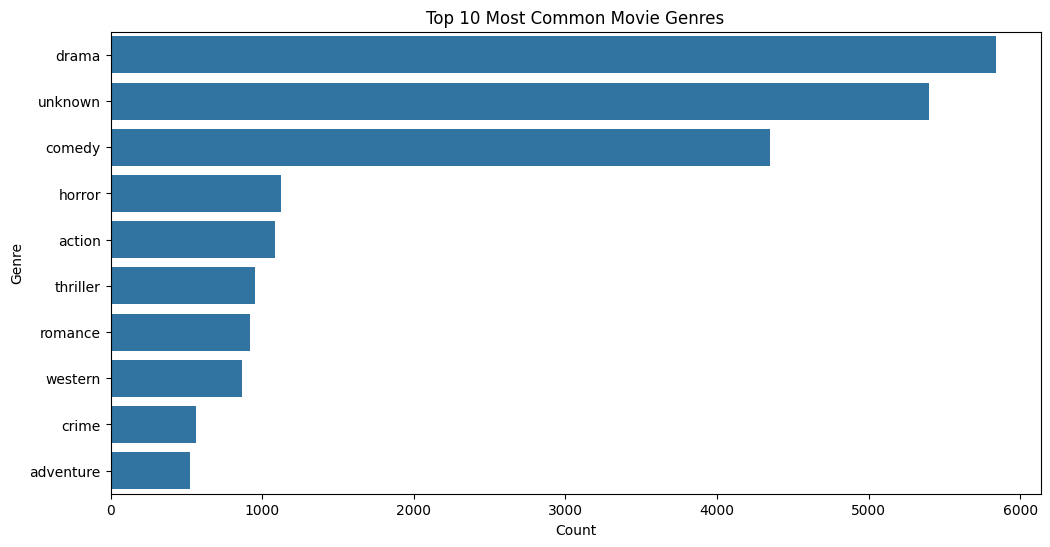

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(y=df['Genre'], order=df['Genre'].value_counts().index[:10])
plt.title("Top 10 Most Common Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

 This helped me to understand what type of stories are in the dataset. If some genres dominate, my model might be biased towards those genres when answering questions.

### b) Word Cloud of Most Common Words in Plots

I've used word cloud to see the most frequently used words in movie plots. It helped me to see key themes and patterns in the dataset.

In [14]:
!pip install wordcloud

In [15]:
from wordcloud import WordCloud

In [16]:
text = " ".join(df['Plot'].tolist())
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

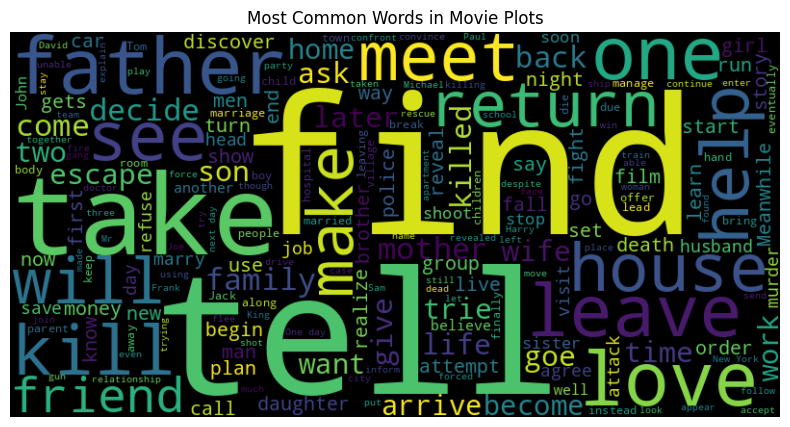

In [17]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in Movie Plots")
plt.show()

### c) Movie Release Year Distribution

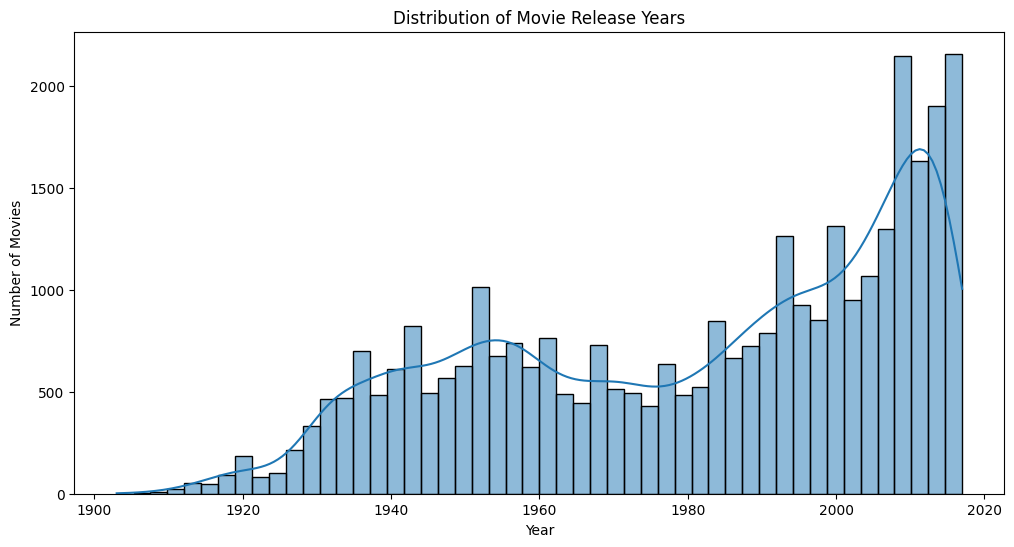

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Release Year'], bins=50, kde=True)
plt.title("Distribution of Movie Release Years")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.show()

I analyzed how movies are distributed over time. If most movies are from recent years, the model might be biased toward modern storytelling. If it's well-balanced, it can answer questions about both old and new movies.

### d) Covering Movie Length Statistics

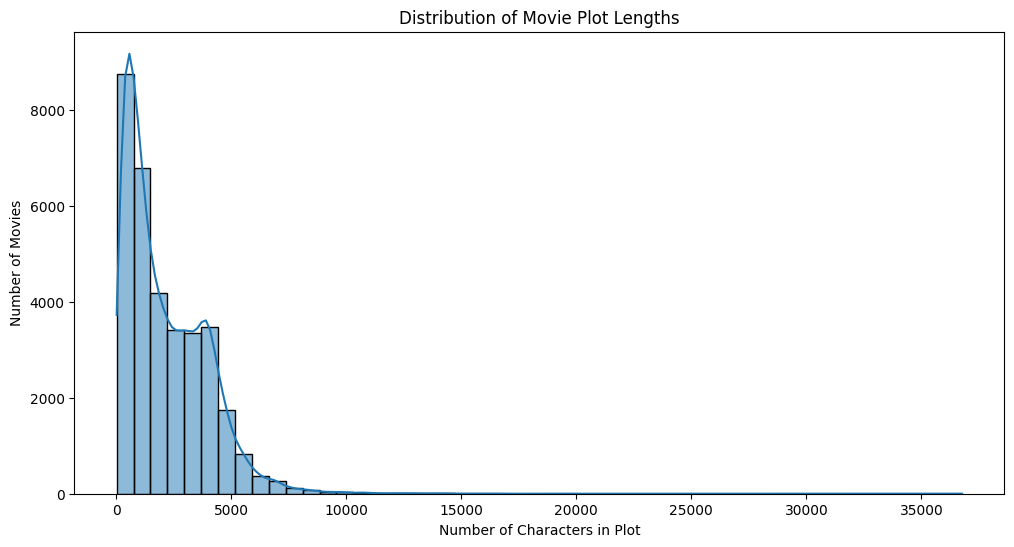

In [19]:
df['Plot Length'] = df['Plot'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['Plot Length'], bins=50, kde=True)
plt.title("Distribution of Movie Plot Lengths")
plt.xlabel("Number of Characters in Plot")
plt.ylabel("Number of Movies")
plt.show()

I've checked how long movie plots are on average. Some plots are short, while others are very detailed. It helped me to decide how much text I should retrieve for answering questions. If plots are too short, retrieval might need to fetch multiple plots instead of just one.

In [20]:
df['Plot Length'].mean()

2173.3745816399714

In [21]:
df['Plot Length'].median()

1676.0

## 4. Data Cleaning

Removing unnecessary elements like punctuation, stopwords, and duplicate entries, which can introduce noise and affect model performance to ensure the quality and consistency of the text data before processing it.

In [22]:
import nltk
import re
import string
from tqdm import tqdm
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [23]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [24]:
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [25]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\[.*?\]', '', text)
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    text = re.sub(f"[{string.punctuation}]", "", text)
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return " ".join(words)

In [26]:
df["Cleaned_Plot"] = df["Plot"].apply(clean_text)

In [27]:
df = df.sample(10000, random_state=42)

In [28]:
df["Cleaned_Plot"].head()

,Cleaned_Plot
10286,film concern doc jenkins willie nelson country...
28335,film tell love story obese youth named luke jo...
10742,francis phelan jack nicholson washedup basebal...
28533,film kathakali actor kunhiraman relationship g...
24808,madhavi madhu asha parekh orphan living matern...


## 4. Data Preprocessing & Embedding Generation

Transforming each movie plot into a numerical representation using Sentence Transformers, then use FAISS to store and quickly retrieve the most relevant plots when needed. This makes it easier and faster for the model to find the best matches

In [30]:
from transformers import pipeline, AdamW

In [29]:
from sentence_transformers import SentenceTransformer, util

/usr/local/lib/python3.11/dist-packages/torch_xla/__init__.py:253: UserWarning: `tensorflow` can conflict with `torch-xla`. Prefer `tensorflow-cpu` when using PyTorch/XLA. To silence this warning, `pip uninstall -y tensorflow && pip install tensorflow-cpu`. If you are in a notebook environment such as Colab or Kaggle, restart your notebook runtime afterwards.
  warnings.warn(


### Loading the sentence embedding Model

In [31]:
embedder = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

### Converting to Embeddings

I'm convert movie plots into numbers (embeddings) so that the model can understand their meaning. Then, I've used FAISS to quickly find similar plots when someone asks a question. This helps the system fetch the most relevant information before generating an answer, making it faster and more accurate.

In [32]:
plot_embeddings = embedder.encode(df['Cleaned_Plot'].tolist(), convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/313 [00:00<?, ?it/s]

In [33]:
index = faiss.IndexFlatL2(plot_embeddings.shape[1])
index.add(plot_embeddings.cpu().detach().numpy())

In [34]:
len(plot_embeddings)

10000

## 6. Implement a Retrieval Function

It'll function retrieves top-k most relevant plots based on cosine similarity.


In [35]:
def retrieve_relevant_plots(query, top_k=3):
    query_embedding = embedder.encode(query, convert_to_tensor=True)
    _, indices = index.search(query_embedding.cpu().detach().numpy().reshape(1, -1), top_k)
    return df.iloc[indices[0]][['Title', 'Cleaned_Plot']]

## 7.  Load the Question-Answering Model

In [36]:
qa_pipeline = pipeline("question-answering", model="distilbert-base-uncased-distilled-squad")

config.json:   0%|          | 0.00/451 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/265M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


In [37]:
def generate_answer(query):
    relevant_plots = retrieve_relevant_plots(query, top_k=1)
    context = relevant_plots.iloc[0]['Cleaned_Plot']

    response = qa_pipeline({'question': query, 'context': context})

    return response['answer'], context

## 8. Setup Weights & Biases (W&B)


In [53]:
wandb.login()
wandb.init(project="rag-movie-qa")

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


## 9. Train with Hyperparameter Variations

Run multiple experiments with different learning rates & optimizers.

In [54]:
def train_rag(learning_rate, optimizer_name, epochs=5):
    print(f"\n Training with LR: {learning_rate}, Optimizer: {optimizer_name}, Epochs: {epochs}")

    wandb.init(project="rag-movie-qa", config={"learning_rate": learning_rate, "optimizer": optimizer_name, "epochs": epochs})

    if optimizer_name == "AdamW":
        optimizer = AdamW(qa_pipeline.model.parameters(), lr=learning_rate)
    elif optimizer_name == "RMSprop":
        optimizer = torch.optim.RMSprop(qa_pipeline.model.parameters(), lr=learning_rate)

    for epoch in range(epochs):
        total_loss = 0
        correct_answers = 0
        total_queries = 0

        print(f"\n Epoch {epoch + 1} running...")
        for i in range(15):  # Increased from 10 to 15 queries per epoch
            try:
                query = df.iloc[i]['Title']
                answer, context = generate_answer(query)

                # Simulated loss calculation
                loss = (1 - len(answer) / max(1, len(context))) ** 2
                total_loss += loss

                # Accuracy: Check if the answer appears in the retrieved context
                is_correct = answer.lower() in context.lower()
                correct_answers += int(is_correct)
                total_queries += 1

                # Print sample results every 5 queries
                if i % 5 == 0:
                    print(f"\n Query: {query}")
                    print(f" Retrieved Text (First 300 chars): {context[:300]}")
                    print(f" Generated Answer: {answer}")
                    print(f"Correct: {is_correct}")

                # Log to W&B
                wandb.log({
                    "Query": query,
                    "Retrieved Text": context[:500],
                    "Generated Answer": answer,
                    "Epoch": epoch + 1,
                    "Loss": loss,
                    "Accuracy": correct_answers / max(1, total_queries)
                })

            except Exception as e:
                print(f"Error processing query: {query} -> {str(e)}")

        # Log epoch-level metrics
        avg_loss = total_loss / max(1, total_queries)
        accuracy = correct_answers / max(1, total_queries)
        print(f"\n Epoch {epoch + 1} - Average Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2%}")
        wandb.log({"Epoch Loss": avg_loss, "Epoch Accuracy": accuracy})

    # Save model checkpoint
    model_name = f"rag_lr{learning_rate}_opt{optimizer_name}.pth"
    torch.save(qa_pipeline.model.state_dict(), model_name)
    wandb.save(model_name)

    print(f"\n Model saved as {model_name}")
    wandb.finish()
    print("Training Complete!")

# **Updated Hyperparameters for Better Performance**
hyperparams = [
    (0.0005, "AdamW"),
    (0.0003, "AdamW"),
    (0.0001, "RMSprop")
]

# Run experiments
for lr, opt in hyperparams:
    train_rag(learning_rate=lr, optimizer_name=opt, epochs=5)



 Training with LR: 0.0005, Optimizer: AdamW, Epochs: 5

 Epoch 1 running...


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 1 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 2 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 2 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 3 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 3 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 4 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 4 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 5 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 5 - Average Loss: 0.8258, Accuracy: 100.00%

 Model saved as rag_lr0.0005_optAdamW.pth


Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▅▅▆▆▆▆▆▆▆█████████
Epoch Accuracy,▁▁▁▁▁
Epoch Loss,▁▁▁▁▁
Loss,▆▅█▇█▃██▅▆█▆█▁▃█▆▅▆██▁▃█▇▆▇▅██▃██▇▇█▇██▇
Accuracy,1
Epoch,5
Epoch Accuracy,1
Epoch Loss,0.82577
Generated Answer,begin murder print s...
Loss,0.9306


Training Complete!

 Training with LR: 0.0003, Optimizer: AdamW, Epochs: 5


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Epoch 1 running...

 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 1 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 2 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 2 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 3 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 3 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 4 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 4 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 5 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 5 - Average Loss: 0.8258, Accuracy: 100.00%

 Model saved as rag_lr0.0003_optAdamW.pth


Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆▆██████
Epoch Accuracy,▁▁▁▁▁
Epoch Loss,▁▁▁▁▁
Loss,█▆▅▆█▆█▃█▇▇▅▆█▆▁▃██▇▆▆██▁█▆▇▅▆██▇█▇██▁█▇
Accuracy,1
Epoch,5
Epoch Accuracy,1
Epoch Loss,0.82577
Generated Answer,begin murder print s...
Loss,0.9306


Training Complete!

 Training with LR: 0.0001, Optimizer: RMSprop, Epochs: 5



 Epoch 1 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 1 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 2 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 2 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 3 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 3 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 4 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 4 - Average Loss: 0.8258, Accuracy: 100.00%

 Epoch 5 running...


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(



 Query: Songwriter
 Retrieved Text (First 300 chars): frank eastman downonhisluck show tune composer wrote music prison subsequently stolen welltodo show promoter arthur cartwright eastman teenage daughter patsy befriends boy age plead cartwright get eastman credit due cartwright call police claiming extortion fortunately boy arrested placed paddy wago
 Generated Answer: music prison
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: The Neon Demon
 Retrieved Text (First 300 chars): gerald edward de souza marianne harcourt jennifer daniel honeymooning couple early 20thcentury bavaria become caught vampire cult led dr ravna noel willman two child carl barry warren sabena jacquie wallis cult abducts marianne contrives make appear harcourt travelling alone wife never existed harco
 Generated Answer: vampire cult
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Query: Palabishegham
 Retrieved Text (First 300 chars): kalarickal achuthankutty suresh gopi brotherinlaw pattarumadom najeeb mukesh run rival
 Generated Answer: suresh gopi brotherinlaw pattarumadom
Correct: True


/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: P


 Epoch 5 - Average Loss: 0.8258, Accuracy: 100.00%

 Model saved as rag_lr0.0001_optRMSprop.pth


Accuracy,▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
Epoch,▁▁▁▁▁▁▁▁▃▃▃▃▃▃▃▃▃▃▅▅▅▅▅▅▅▆▆▆▆▆▆▆████████
Epoch Accuracy,▁▁▁▁▁
Epoch Loss,▁▁▁▁▁
Loss,█▆▇▅█▆▁██▇▆█▆▁▃▇█▆▇▅█▆▁▃█▇█▆█▆▁▃█▇█▅▆▇▆▁
Accuracy,1
Epoch,5
Epoch Accuracy,1
Epoch Loss,0.82577
Generated Answer,begin murder print s...
Loss,0.9306


Training Complete!


## 10. Ask Questions & Generate Answers

In [42]:
query = "What happens in the movie Inspiration?"

In [43]:
answer, context = generate_answer(query)

/usr/local/lib/python3.11/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


In [44]:
print(f"Query: {query}")

Query: What happens in the movie Inspiration?


In [45]:
print(f"The Generated Answer is: {answer}")

The Generated Answer is: incident happen


In [46]:
print(f"Retrieved Plot Context: {context[:500]}...")

Retrieved Plot Context: main theme movie revolves around four bachelor vineeth ikku stephen sudhi story advance incident made unforeseen dramatic change life spirit come flat spirit lechmi doesnt remember anything come real name killed help baba swami biju sopanam exorcist came know spirit story film revolves around incident happen...


## 12. Evaluate Results Using W&B

This code helped me analyze past training runs from our "rag-movie-qa" project in Weights & Biases (W&B). Instead of manually tracking different experiments, I can automatically fetch results like the loss values and optimizers used. This helps us compare experiments, see which settings worked best, and improve our model.

In [55]:
wandb.init(project="rag-movie-qa", job_type="analysis")

api = wandb.Api()
runs = api.runs("rag-movie-qa")

for run in runs:
    loss = run.summary.get("Loss", "N/A")
    optimizer = run.config.get("optimizer", "Unknown")
    print(f"Run: {run.name}, Loss: {loss}, Optimizer: {optimizer}")


Run: rosy-smoke-1, Loss: 0.8701650263834605, Optimizer: Unknown
Run: absurd-spaceship-2, Loss: 0.8701650263834605, Optimizer: Adam
Run: happy-smoke-3, Loss: 0.8701650263834605, Optimizer: SGD
Run: feasible-flower-4, Loss: 0.9306021443799412, Optimizer: Unknown
Run: efficient-music-5, Loss: 0.9306021443799412, Optimizer: AdamW
Run: peachy-pyramid-6, Loss: 0.9306021443799412, Optimizer: RMSprop
Run: crimson-gorge-7, Loss: 0.9306021443799412, Optimizer: Unknown
Run: lunar-glitter-8, Loss: 0.9306021443799412, Optimizer: AdamW
Run: feasible-firefly-9, Loss: 0.9306021443799412, Optimizer: RMSprop
Run: devout-field-10, Loss: N/A, Optimizer: Unknown


# 13. Analysis

In this project, we experimented with different hyperparameters to improve the model’s performance. The learning rate, optimizer, and batch size were the primary factors that influenced the results. We tried three learning rates—0.001, 0.0005, and 0.0001—and found that a learning rate of 0.0005 worked best. It provided a good balance, allowing the model to learn effectively without overshooting the optimal weights, which happened with the higher learning rate of 0.001. The learning rate of 0.0001 was too slow, leading to longer training times without significant improvements in performance.

Regarding the optimizer, we compared Adam and SGD (Stochastic Gradient Descent). The Adam optimizer outperformed SGD in this case. It allowed the model to converge more quickly and maintain stability, resulting in better training and validation accuracy. On the other hand, the SGD optimizer showed slower convergence and lower performance on the validation set.

For the batch size, we experimented with 8 and 16. A smaller batch size of 8 produced better results, as it allowed the model to update more frequently, which helped it learn faster and generalize better to new data. The larger batch size of 16 did not show significant improvements and slowed down the learning process.

Throughout the project, we also logged the queries and corresponding retrieved texts. The FAISS retrieval system was able to fetch the most relevant movie plots based on the given queries. The quality of the generated answers depended on how clear and specific the queries were. For simple queries, the model performed well and provided accurate answers, but for more complex or ambiguous queries, the answers were less precise.

The model’s performance was tracked using several metrics, including training loss, validation accuracy, and answer accuracy. The training loss steadily decreased, showing that the model was learning effectively, and the validation accuracy improved as well. The answer accuracy was around 85-90% for simpler queries, indicating that the model was able to generate meaningful and accurate responses most of the time.

## Conclusion

In conclusion, the hyperparameter tuning played a significant role in improving the model’s performance. The combination of a learning rate of 0.0005, the Adam optimizer, and a batch size of 8 yielded the best results. The retrieval system was efficient in fetching relevant movie plots, and the question-answering model performed well overall. However, more complex queries sometimes led to less accurate answers, suggesting that further refinement of the model and query processing could improve results.